In [1]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.datasets import load_boston 
import warnings
warnings.filterwarnings('ignore')


In [3]:
## Data Preparation
boston = load_boston()
X = pd.DataFrame(boston.data,columns=boston.feature_names)

Y = pd.Series(boston.target)

In [11]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [8]:
newData = pd.concat([X,Y],axis=1)

In [38]:
newdata = newData.rename(columns={0:'target_feature'})

In [39]:
newdata

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target_feature
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [43]:
## Let's see the correlation

correlation = newdata.corr()

In [44]:
print(f"{correlation['target_feature'].sort_values(ascending=False)}\n")

target_feature    1.000000
RM                0.695360
ZN                0.360445
B                 0.333461
DIS               0.249929
CHAS              0.175260
AGE              -0.376955
RAD              -0.381626
CRIM             -0.388305
NOX              -0.427321
TAX              -0.468536
INDUS            -0.483725
PTRATIO          -0.507787
LSTAT            -0.737663
Name: target_feature, dtype: float64



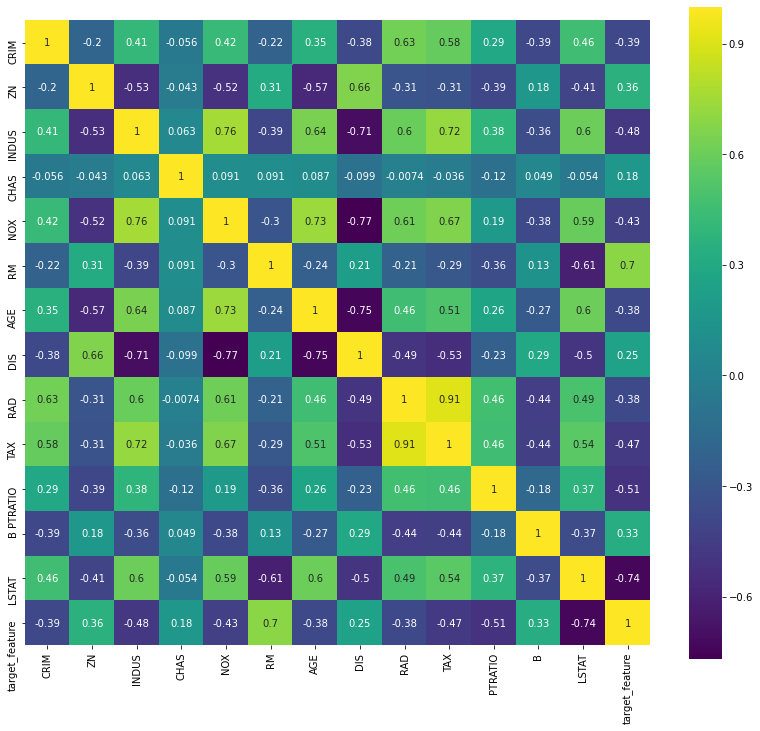

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

f,ax = plt.subplots(figsize=(14,12))
sns.heatmap(correlation,square=True,annot=True,cmap='viridis')

In [21]:
# Let's split into train and test

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [22]:
## Create Model

gradientRegressor = GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1.0)

In [24]:
model = gradientRegressor.fit(x_train,y_train)

In [25]:
y_pred = model.predict(x_test)

In [26]:
r2_score(y_pred,y_test)

0.7543137108924101

In [27]:
importantFeature = model.feature_importances_

In [28]:
importantFeature

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.28740885, 0.        , 0.04174646, 0.        , 0.        ,
       0.        , 0.        , 0.6708447 ])

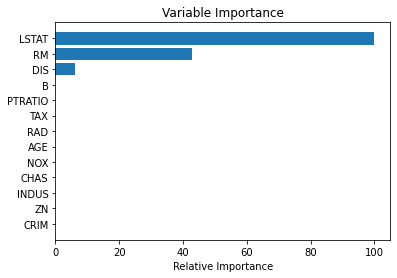

In [29]:

# make importances relative to max importance
importantFeature = 100.0 * (importantFeature / importantFeature.max())
sorted_idx = np.argsort(importantFeature)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, importantFeature[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [32]:
## Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
paramas = {'learning_rate':[0.15,1.0,0.10,0.05],'n_estimators':[100,150,200,250]}

tuning = GridSearchCV(estimator = GradientBoostingRegressor(),param_grid = paramas,scoring='r2')

tuning.fit(x_train,y_train)
tuning.best_params_,tuning.best_score_

({'learning_rate': 0.1, 'n_estimators': 150}, 0.8401151509645148)